# TorchVision Object Detection Finetuning Tutorial

https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html#torchvision-object-detection-finetuning-tutorial

# 0. 자신의 개발환경이 PyTorch GPU 버전을 사용할 수 있는지 확인해 봅니다.

In [1]:
import torch

In [3]:
torch.__version__

'2.2.2'

In [2]:
import torch
torch.cuda.is_available()

True

# 1. 다음 경로에서 PennFudanPed dataset 를 다운로드 받아 자신의 개발환경에 압축을 풉니다.

https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip

# 2. 다음 명령어로 디렉토리의 데이터를 확인해 봅니다.

In [4]:
!dir PennFudanPed/

����ġ�� Ʋ���ϴ� - "".


# 3. 다운로드 받은 데이터 중 하나의 이미지를 읽어 봅니다. (hint: torchvision.io.read_image)

* 경로: PennFudanPed/PNGImages/FudanPed00001.png

In [ ]:
from torchvision.io import read_image

(torch.Tensor, torch.Size([3, 536, 559]))

# 4. 읽어 드린 이미지를 화면에 출력해 봅니다. - hint: image.permute(1, 2, 0), plt.imshow

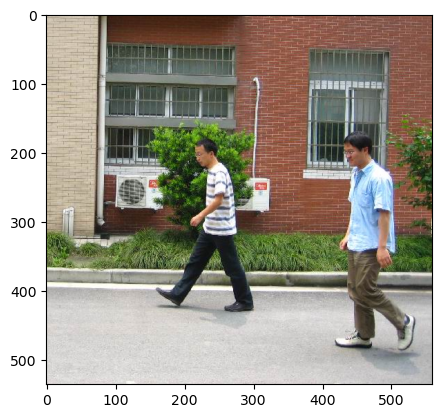

# 5. 튜토리얼의 PennFudanDataset class 를 이용하여 dataset 객체를 생성하세요. (hint: 클래스의 생성자를 확인하여 어떤 인자들을 전달해야 하는지 파악합니다.)

* F.get_size 에러 발생 시: F.get_image_size 사용

In [ ]:
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F


class PennFudanDataset(torch.utils.data.Dataset):
    pass

In [ ]:
import torchvision.transforms.v2 as v2

transforms = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float, scale=True),
            ])

/home/edward/miniconda3/envs/aip/lib/python3.12/site-packages/torchvision/transforms/v2/functional/_deprecated.py:20: UserWarning: The function `get_image_size(...)` is deprecated and will be removed in a future release. Instead, please use `get_size(...)` which returns `[h, w]` instead of `[w, h]`.
  warnings.warn(


(Image([[[0.8275, 0.8235, 0.8314,  ..., 0.5608, 0.5725, 0.5804],
         [0.7020, 0.6784, 0.6667,  ..., 0.4941, 0.5020, 0.5020],
         [0.8000, 0.7608, 0.7373,  ..., 0.5098, 0.5137, 0.5098],
         ...,
         [0.8863, 0.8510, 0.8275,  ..., 0.7176, 0.7216, 0.7255],
         [0.9059, 0.8588, 0.8235,  ..., 0.7333, 0.7333, 0.7294],
         [0.8824, 0.8902, 0.8431,  ..., 0.7451, 0.7451, 0.7333]],
 
        [[0.7843, 0.7804, 0.7882,  ..., 0.3765, 0.3882, 0.3961],
         [0.6588, 0.6353, 0.6235,  ..., 0.3098, 0.3176, 0.3176],
         [0.7569, 0.7176, 0.6941,  ..., 0.3255, 0.3294, 0.3255],
         ...,
         [0.8627, 0.8275, 0.8039,  ..., 0.7176, 0.7216, 0.7255],
         [0.8824, 0.8353, 0.8000,  ..., 0.7333, 0.7333, 0.7294],
         [0.8588, 0.8667, 0.8196,  ..., 0.7451, 0.7451, 0.7333]],
 
        [[0.7137, 0.7098, 0.7176,  ..., 0.3059, 0.3176, 0.3255],
         [0.5882, 0.5647, 0.5529,  ..., 0.2392, 0.2471, 0.2471],
         [0.6863, 0.6471, 0.6235,  ..., 0.2549, 0.2588, 

In [ ]:
dataset[0][0].shape, dataset[0][1]['boxes'].shape

(torch.Size([3, 536, 559]), torch.Size([2, 4]))

# 6. dataset 으로부터 이미지, bbox, label 을 함께 화면에 표시하세요. (hint: torchvision.utils.draw_bounding_boxes, v2.ToPILImage())

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from torchvision.utils import draw_bounding_boxes

image_tensor, target = dataset[0]
boxes = target['boxes']
labels = target['labels']

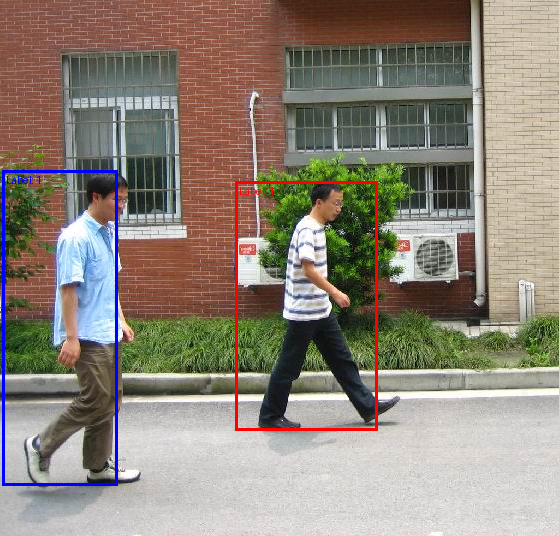

# 7. PennFudanDataset 객체를 두 개 만들어 dataset_train 와 dataset_test 변수에 저장합니다. 그런 다음 데이터를 읽을 수 있는지 테스트해 봅니다.

In [ ]:
from torchvision import transforms

image_transforms = {
    'train': transforms.v2.Compose([
        transforms.v2.RandomHorizontalFlip(),
        transforms.v2.ToImage(),
        transforms.v2.ToDtype(torch.float32, scale=True),
    ]),
    'test': transforms.v2.Compose([
        transforms.v2.ToImage(),
        transforms.v2.ToDtype(torch.float32, scale=True),
    ]),
}


In [ ]:
for X, y in dataset_train:
  print(type(X), X.shape)
  print(type(y), y['boxes'], y['labels']) # background and person
  print(y.keys())
  break

<class 'torchvision.tv_tensors._image.Image'> torch.Size([3, 536, 559])
<class 'dict'> BoundingBoxes([[159., 181., 301., 430.],
               [419., 170., 534., 485.]], format=BoundingBoxFormat.XYXY, canvas_size=[559, 536]) tensor([1, 1])
dict_keys(['boxes', 'masks', 'labels', 'image_id', 'area', 'iscrowd'])


In [ ]:
for X, y in dataset_test:
  print(type(X), X.shape)
  print(type(y), y['boxes'], y['labels']) # background and person
  print(y.keys())
  break

<class 'torchvision.tv_tensors._image.Image'> torch.Size([3, 536, 559])
<class 'dict'> BoundingBoxes([[159., 181., 301., 430.],
               [419., 170., 534., 485.]], format=BoundingBoxFormat.XYXY, canvas_size=[559, 536]) tensor([1, 1])
dict_keys(['boxes', 'masks', 'labels', 'image_id', 'area', 'iscrowd'])


# 8. 주어진 코드를 이용하여 train 과 test 로 데이터를 나눕니다. (120개, 50개)

In [ ]:
# split the dataset in train and test set
indices = torch.randperm(len(dataset_train)).tolist()
dataset_train = torch.utils.data.Subset(dataset_train, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

In [ ]:
len(dataset_train), len(dataset_test)

(120, 50)

# 9. Faster RCNN 모델을 생성합니다.

https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn_v2.html

* fasterrcnn_resnet50_fpn_v2 도우미 함수를 사용하세요.
* weights 는 FasterRCNN_ResNet50_FPN_V2_Weights 를 사용하세요.



FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

# 10. 튜토리얼의 get_model_instance_segmentation 함수를 참고하여 transfer learning 을 준비합니다. 오리지널 모델은 91개의 클래스를 탐지하므로 우리의 dataset에 맞게 2로 수정해야 합니다.

* 이때, mask 관련 코드는 사용하지 않습니다.

* 모델의 마지막 레이어의 출력이 2로 변경됐는지 확인해 봅니다.

* num_classes = 2  

* 0은 배경(background) 1은 사람(person)


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

num_classes = 2
# Implement your code

model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

# 11. 모델을 훈련시키기 위해 필요한 파일을 다운로드 받아 자신의 개발환경에 복사합니다. (pycocotools 라이브러리 설치 필요)

* https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
* https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
* https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py
* https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
* https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py


In [ ]:
!pip install pycocotools

# 12. 튜토리얼에서는 train 코드를 제공합니다. 실습에 맞춰 수정된 코드를 자신의 개발환경에서 실행해 봅니다. (아래 코드를 수정하지 마세요!)

In [ ]:
import utils
from engine import train_one_epoch, evaluate

# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=1,
    shuffle=True,
    collate_fn=utils.collate_fn
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,
    shuffle=False,
    collate_fn=utils.collate_fn
)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

# let's train it for 5 epochs
num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

Epoch: [0]  [  0/120]  eta: 0:00:08  lr: 0.000047  loss: 0.3011 (0.3011)  loss_classifier: 0.1150 (0.1150)  loss_box_reg: 0.1724 (0.1724)  loss_objectness: 0.0045 (0.0045)  loss_rpn_box_reg: 0.0091 (0.0091)  time: 0.0706  data: 0.0061  max mem: 2285
Epoch: [0]  [ 10/120]  eta: 0:00:07  lr: 0.000467  loss: 0.2112 (0.2449)  loss_classifier: 0.0793 (0.0898)  loss_box_reg: 0.1163 (0.1227)  loss_objectness: 0.0082 (0.0191)  loss_rpn_box_reg: 0.0081 (0.0133)  time: 0.0716  data: 0.0054  max mem: 2285
Epoch: [0]  [ 20/120]  eta: 0:00:07  lr: 0.000886  loss: 0.2112 (1.6248)  loss_classifier: 0.0754 (0.0862)  loss_box_reg: 0.1163 (0.1163)  loss_objectness: 0.0082 (0.5468)  loss_rpn_box_reg: 0.0043 (0.8756)  time: 0.0700  data: 0.0054  max mem: 2285
Epoch: [0]  [ 30/120]  eta: 0:00:06  lr: 0.001306  loss: 0.2103 (1.1609)  loss_classifier: 0.0651 (0.0805)  loss_box_reg: 0.0850 (0.1094)  loss_objectness: 0.0084 (0.3751)  loss_rpn_box_reg: 0.0043 (0.5959)  time: 0.0691  data: 0.0051  max mem: 2285


# 13. 주어진 코드를 이용하여 훈련된 모델을 테스트해 봅니다. 출력값을 확인해 봅니다.

In [ ]:
model.eval()
for X, y in data_loader_test:
  X = X[0].to(device)
  predictions = model([X,])
  pred = predictions[0]
  break
pred

{'boxes': tensor([[253.8325,  55.4221, 394.0979, 335.2642],
         [110.2266,  47.3758, 206.7855, 381.1020],
         [207.5833,  42.0083, 348.6166, 338.6796],
         [ 53.0830,  52.0073, 163.0746, 391.0453],
         [185.2668,  34.8312, 295.2600, 365.2363],
         [143.8862,  47.3757, 264.4350, 378.8180],
         [  0.0000,  54.7673, 132.8924, 402.8726],
         [294.9553,  46.6097, 461.0230, 344.8212]], device='cuda:0',
        grad_fn=<StackBackward0>),
 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
 'scores': tensor([0.8786, 0.8655, 0.5805, 0.5261, 0.4869, 0.4209, 0.3686, 0.0774],
        device='cuda:0', grad_fn=<IndexBackward0>)}

# 14. 예측 결과를 draw_bounding_boxes 를 이용하여 화면에 표시합니다.

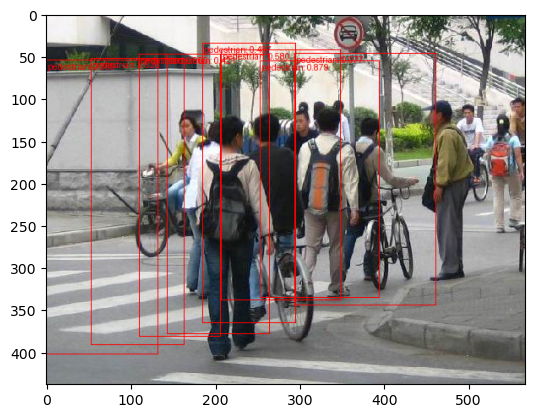

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes

pred_boxes = pred["boxes"]
pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
